# STAT3612 Assignment 1
# Name: Gopalakrishnan Amruthraghav(3035436674)

## Importing Libraries

In [371]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import warnings
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
pd.set_option('display.max_rows', 11000) 

## Reading Datasets from the csv and xlsx file

In [372]:
df = pd.read_csv("HelocData.csv")
df2 = pd.read_excel("HelocDataDict.xlsx")

## I. Calculating missing values for each feature

In [373]:
var = 'x'
col = [] 
count = []
for i in range(1, 24):
    temp = var + str(i)
    col.append(temp)
    measure = df[temp].value_counts() #counts the value of each number
    sum=0
    if -9 in measure:
        sum += measure[-9]
    if -8 in measure:
        sum += measure[-8]
    if -7 in measure:
        sum += measure[-7]
    count.append(sum)
    #print(i+":"+str(sum)) #

## I. Visualizing the Missing Numbers for Each Feature

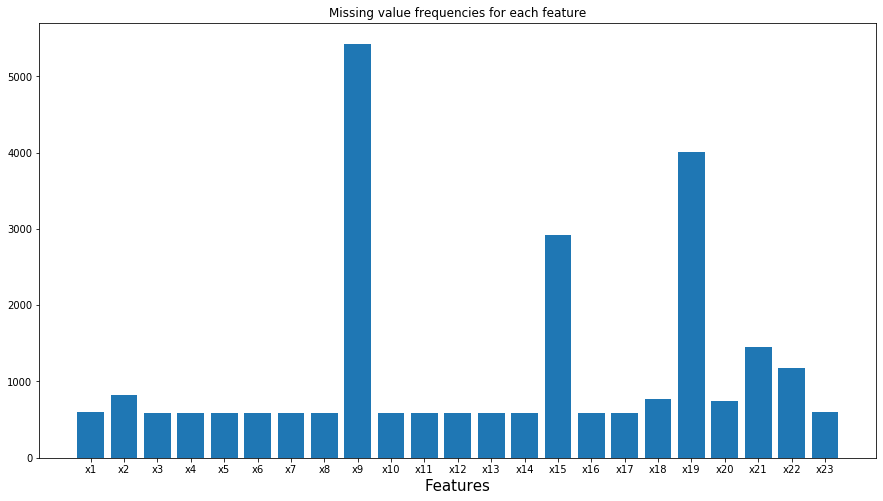

In [374]:
plt.figure(figsize=(15,8))
plt.bar(col,count)
plt.title('Missing value frequencies for each feature')
plt.xlabel('Features', fontsize=15)
plt.show()

## 2. Setting np.random.seed to UID and split the data for training and testing purposes

In [375]:
np.random.seed(3035436674)
df_train,df_test = train_test_split(df,test_size=.2)

## 2. Imputing the missing values in the training data with mean of the observations

In [376]:
df_train = df_train.replace(to_replace=[-7,-8,-9], value=np.nan)
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
for i in df_train.columns:
    if (i != 'RiskFlag'):
        imp.fit(df_train[i][:,np.newaxis])
def df_imputer(d,impute):
    df_cp = d.copy()
    for i in d.columns:
        if (i != 'RiskFlag'):
            df_cp[i] = impute.transform(df_cp[i][:,np.newaxis])
    return df_cp
df_train = df_imputer(df_train,imp)

## 3. Displaying Boxplot of each features grouped by RiskFlag 

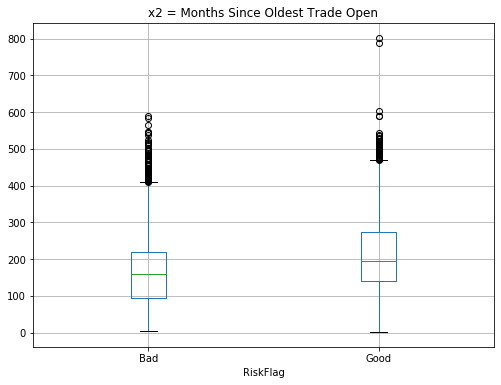

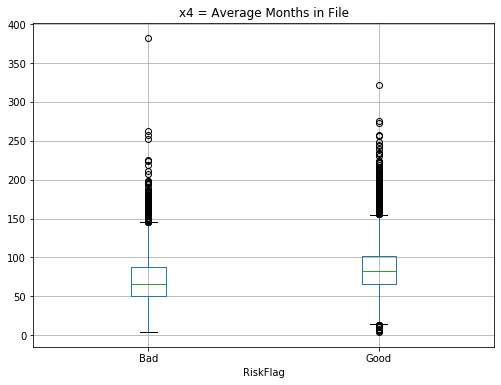

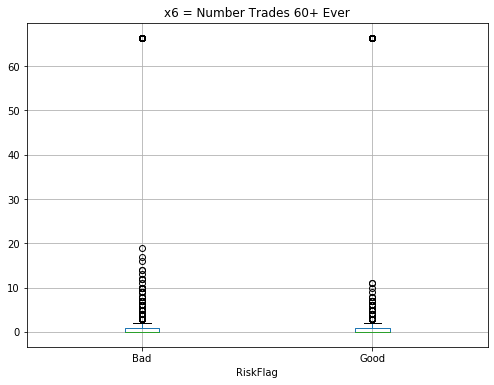

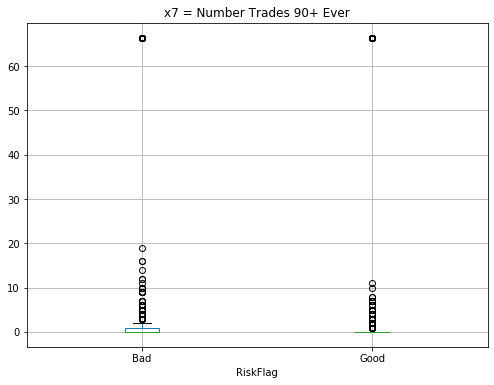

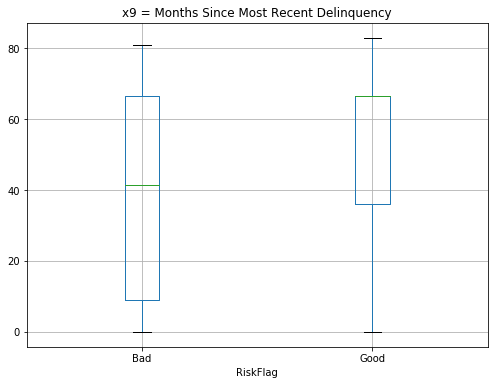

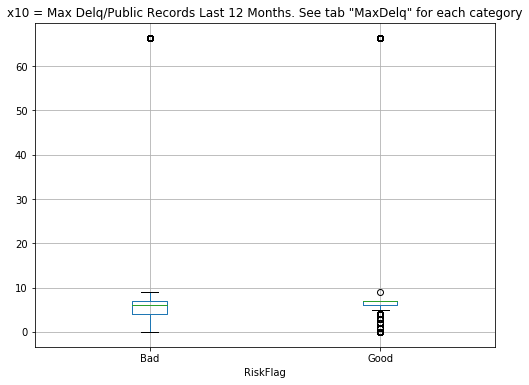

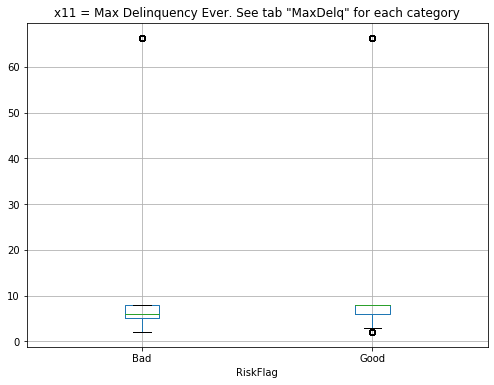

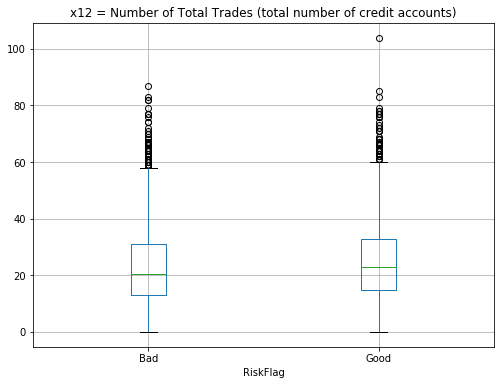

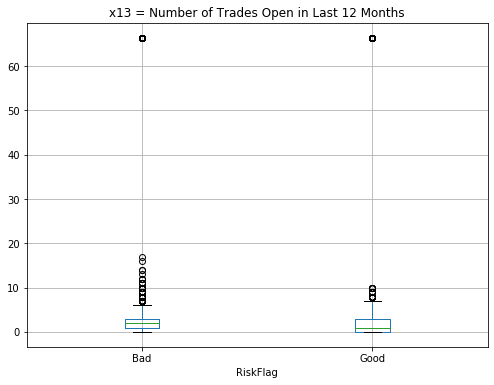

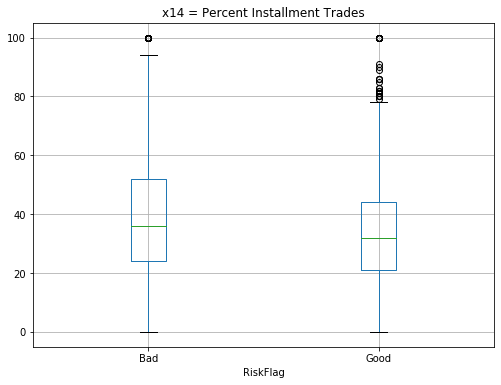

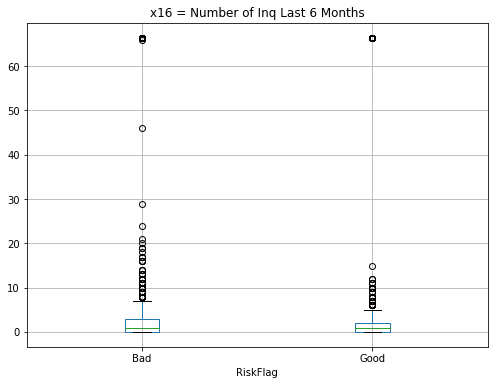

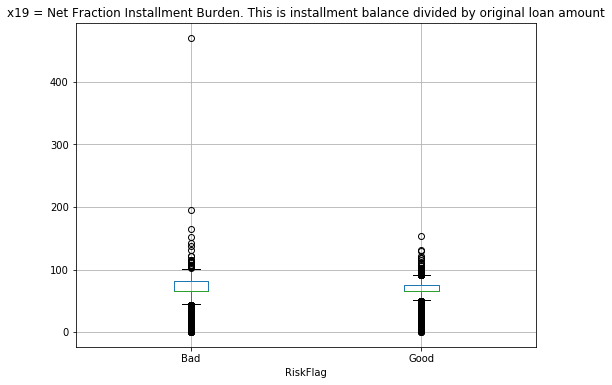

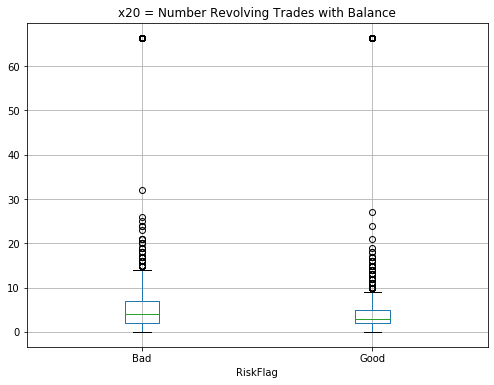

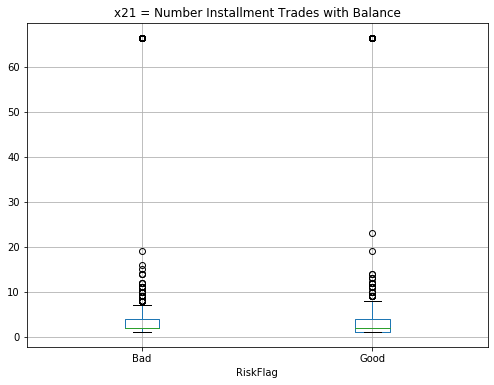

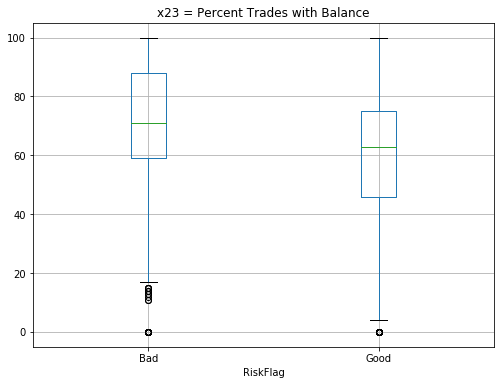

In [377]:
for i in range(1,24):
    df_train.boxplot(column = var+str(i), by='RiskFlag',figsize=(8,6), grid=True)
    plt.title(var+str(i)+" = "+df2['Description'][i])
    plt.suptitle("")
    plt.show()

## 4. Selecting Top 5 Features and elaborating the intuition behind it

#### Upon Analysing the boxplots of 23 graphs, I have choosen the following Top 5 Features: 
 - #### x1,x4,x5,x15,x18 as these features showed higher variation in the grouped values of Riskflag relative to other features
 - Also these features poses very close medians between 'Bad' and 'Good', fewer missings values, less outliers
 
#### Cell for doing some preprocesssing before logit calculation

In [391]:
X_train = df_train.iloc[:, 1:24]
X_train = X_train[['x1', 'x4', 'x5', 'x16', 'x18']]
X_train['index']= [i for i in range(1,X_train.shape[0]+1)]
X_train = X_train.set_index('index')
Y_train = df_train.iloc[:,0:1]
Y_train['index']= [i for i in range(1,Y_train.shape[0]+1)]
Y_train = Y_train.set_index('index') 
Y_train['RiskFlag'] = Y_train['RiskFlag'].replace('Bad',0)
Y_train['RiskFlag'] = Y_train['RiskFlag'].replace('Good',1)

X_test = df_test.iloc[:, 1:24]
X_test = X_test[['x1', 'x4', 'x5', 'x16', 'x18']]
X_test['index']= [i for i in range(1,X_test.shape[0]+1)]
X_test = X_test.set_index('index')
Y_test = df_test.iloc[:,0:1]
Y_test['index']= [i for i in range(1,Y_test.shape[0]+1)]
Y_test = Y_test.set_index('index') 
Y_test['RiskFlag'] = Y_test['RiskFlag'].replace('Bad',0)
Y_test['RiskFlag'] = Y_test['RiskFlag'].replace('Good',1)

## 4. Walds Test

In [392]:
X1 = sm.add_constant(X_train)
logreg = sm.Logit(Y_train,X1).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.563906
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               RiskFlag   No. Observations:                 8367
Model:                          Logit   Df Residuals:                     8361
Method:                           MLE   Df Model:                            5
Date:                Wed, 09 Oct 2019   Pseudo R-squ.:                  0.1852
Time:                        20:56:45   Log-Likelihood:                -4718.2
converged:                       True   LL-Null:                       -5790.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.4708      0.292    -25.547      0.000      -8.044      -6.898
x1             0.0909      0.

## 4. Ranking the variables according to the variable importance based on walds test

#### According to the walds test, we first take a look at the p-values followed by the absolute z value
#### Small p values are associated with larger Wald statistics. 
#### Looking at the table we can stay that all the variables has p-value = 0(which is good) and then we priortize it using absolute z value based on the walds test. 

#### Following is the order of importance (based on the absolute value of z)
 - x1
 - x5 
 - x4 
 - x18
 - x15

## 4. Fitting the logistic model with the selected features

In [393]:
logreg = LogisticRegression(C=1e9, solver='newton-cg')
logreg.fit(X_train, Y_train)
print("Coefficients :", np.round(logreg.intercept_,4), np.round(logreg.coef_,4))

Coefficients : [-7.4708] [[ 0.0909  0.0065  0.0296 -0.0091 -0.0088]]


## 5. Interpreting the fitted logistic model

#### p is the probability of getting good. 
 - While the other conditions remain constant, with one unit of increase in x1, there is an increase of 0.0909 units in ln(p/(1-p)). 
 - #While the other conditions remain constant, with one unit of increase in x4 , there is an increase of 0.0065 units in ln(p/(1-p)). 
 - #While the other conditions remain constant, with one unit of increase in x5, there is a increase of 0.0296 units in ln(p/(1-p)). 
 - #While the other conditions remain constant, with one unit of increase in x15, there is a decrease of 0.0091 units in ln(p/(1-p)). 
 - #While the other conditions remain constant, with one unit of increase in x18, there is a decrease of 0.0088 units in ln(p/(1-p)).
 - #The y-intercept -7.4708 represents the log odds of the probability of being good.


 - Precison is for "all instances classified positive, what percent was correct?”
 - Recall is for "all instances that were actually positive, what percent was classified correctly?
 - F1 is the harmonice mean between Precision and Recall



## 5. Accuracy of the Training and Testing Set

In [394]:
Y_pred_train = logreg.predict(X_train)

Y_pred_test = logreg.predict(X_test)

a_train = accuracy_score(Y_train, Y_pred_train)
a_test = accuracy_score(Y_test, Y_pred_test)

print('Accuracy on the training set =', np.round(a_train,4))
print('Accuracy on the test set =', np.round(a_test,4))

Accuracy on the training set = 0.7092
Accuracy on the test set = 0.7314


## 5. Printing classifiction report

In [395]:
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75      1085
           1       0.74      0.68      0.71      1007

    accuracy                           0.73      2092
   macro avg       0.73      0.73      0.73      2092
weighted avg       0.73      0.73      0.73      2092



## 5. Confusion Matrix

In [396]:
print(confusion_matrix(Y_test, Y_pred_test).T)

[[843 320]
 [242 687]]
